imports

In [162]:
import pandas as pd
import numpy as np
import json

loading data

In [163]:
# location dataframe
location_df = pd.read_csv('SaO_Optilandia_resub_locations.csv')

# links dataframe
links_df = pd.read_csv('SaO_Optilandia_resub_links.csv')

# extract lorry data from json
lorry_data = json.load(open('SaO_Optilandia_resub_depot_lorries.json', 'r'))

# set count to 0
k = 0

# initialise lorry list
lorry = []

# loop -> set i to the respective lorry key
for i in lorry_data.keys():
    # set j to the the number of lorries at key 'i'
    for j in range(0, len(lorry_data[i])):
        # append each lorry in lorry_data to lorry list
        lorry.append(pd.DataFrame(lorry_data[i][j], index=[k]))
        # accumulate index
        k += 1

# lorry dataframe
lorry_df = pd.concat(lorry)

In [164]:
# show first 5 rows of lorry_df
lorry_df.head()

,lorry_id,capacity,cpm,cptm
0,124-0,8,1.1,1.3
1,124-1,8,1.1,1.3
2,124-2,16,1.8,0.8
3,124-3,25,2.3,0.5
4,127-0,8,1.1,1.3


In [165]:
# list of depot locations (where nodes == depot)
depot_locations = np.where(location_df.is_depot)[0]

# list of customer locations (where nodes == customers)
customer_locations = np.where(location_df.is_customer)[0]

imports + visualising the map

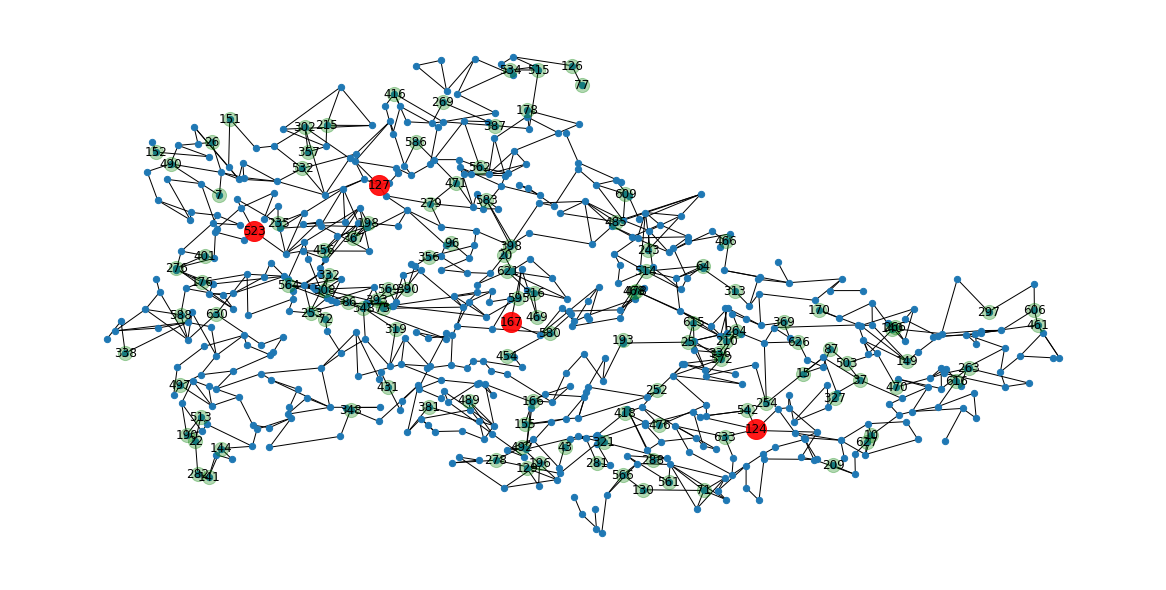

In [227]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt 

# parwise distance calculation for each node
euclidean = squareform(pdist(location_df[['x', 'y']]))

# edges list initialisation
edges = []

# loop through links_df rows
for _, (i, j) in links_df.iterrows():
    # append node at i, node at j, and their pairwise distance to edges
    edges.append((i, j, euclidean[i, j]))

# pos dict intialisation
pos = {}

# loop through location_df rows
for k, v in location_df[['x', 'y']].iterrows():
    # update pos dict with array of k, v 
    pos.update({k:v.values})

# initialise depot_labels dict
depot_labels = {}

# loop throgugh depot_locations
for i in depot_locations:
    # update depot_labels dict with {i:i}
    depot_labels.update({i:i})

# initialise customer_labels dict
customer_labels = {}

# loop through customer_locations
for i in customer_locations:
    # update customer_labels dict with {i:i}
    customer_labels.update({i:i})

# initialise nx Graph
G = nx.Graph()

# feed node list to G
G.add_nodes_from(location_df['id'].to_numpy())

# feed edges list to G
G.add_weighted_edges_from(edges)

# resize figure 
plt.figure(figsize=(16, 8))

# sketch graph
nx.draw(G, pos=pos, node_size=40)

# label depot nodes
nx.draw_networkx_labels(G, pos, depot_labels)

# label customer nodes
nx.draw_networkx_labels(G, pos, customer_labels)

# mark depot nodes
nx.draw_networkx_nodes(G, pos=pos, nodelist=depot_locations, node_color='r', node_size=400, alpha=0.9)

# mark customer nodes
nx.draw_networkx_nodes(G, pos=pos, nodelist=customer_locations, node_color='g', node_size=200, alpha=0.3)


clustering nodes